<a href="https://colab.research.google.com/github/gongx030/Etv2_limb_manuscript/blob/main/Correlation_and_Pathway_analysis_limb_ATAC_seq_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The purpose of this notebook is to find regions similar to ZRS for limb ATAC-seq with new data




In [ ]:
start_time0 <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 'dplyr', 
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'gsl','gplots', 'coexnet', 'umap', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'ggplot2', 'ggrepel', 'clusterProfiler','tidyr', 
    'biomaRt', 'GO.db','ReactomePA', 'ggnewscale', 'hopach','cccd'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'SummarizedExperiment',
  'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel', 'gsl', 'gplots', 'coexnet',
  'umap', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'ggrepel',
  'clusterProfiler', 'biomaRt', 'GO.db', 'ReactomePA', 'ggnewscale', 'hopach'

also installing the dependencies ‘rjson’, ‘gridGraphics’, ‘lazyeval’, ‘GenomicAlignments’, ‘restfulr’, ‘Rhtslib’, ‘formatR’, ‘R.oo’, ‘R.methodsS3’, ‘gsubfn’, ‘proto’, ‘chron’, ‘plogr’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘ape’, ‘tidytree’, ‘treeio’, ‘tweenr’, ‘polyclip’, ‘RcppArmadillo’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘Biostrings’, ‘rtracklayer’, ‘Rsamtools’, ‘lambda.r’, ‘futile.options’, ‘bitops’, ‘affyio’, ‘preprocessCo

### Install `chromVAR` and `chromVARmotifs`

In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.1 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]


Installing 1 packages: TxDb.Hsapiens.UCSC.hg19.knownGene

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpXGMuOu/remotes46201fcfef/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpXGMuOu/remotes4648b27261/YuLab-SMU-ChIPseeker-78edeb0/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(BiocParallel)
register(MulticoreParam(2))
library(SummarizedExperiment)
library(dplyr)
library(gplots)
library(coexnet)
library(rtracklayer)
library(futile.logger)
library(umap)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(ggplot2)
library(ggrepel)
library(ChIPseeker)
library(clusterProfiler)
library(tidyr)
library(GO.db)
library(ReactomePA)
library(ggnewscale)
library(stringr)
library(hopach)
library(cccd)
library(igraph)

Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loading 

## Read the metadata file

In [ ]:
remote_meta_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Limb_Metadata.tsv'
local_meta_file <- gsub('https://s3.msi.umn.edu/', './', remote_meta_file)
system(sprintf('wget -x -c -nH %s', remote_meta_file))

In [ ]:
meta <- read.table(local_meta_file, header = TRUE, sep = '\t')
head(meta)

,Name,BAM,BED,BigWig
,<chr>,<chr>,<chr>,<chr>
1,Etv2cKO_10-31-20_S7,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
2,Etv2cKO_11-07-20_S8,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
3,Etv2cKO_11-28-20_S9,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
4,Etv2cKO_12-1-20_S10,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
5,Etv2cKO_12-9-20_S11,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
6,LimbWT_1_12-4-20_S12,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw


In [ ]:
meta <- meta[!grepl('Sall|916-', meta$Name),] ##Only keeping the 25 old and 7 new atac seq data 

### Data filtering and renaming the files to keep the naming consistent with the previous script

In [ ]:
meta_name <- gsub('-|_S[0-9]+', '', meta$Name)


In [ ]:
meta_name <- gsub('7[0-9]+_', '', meta_name)
meta_name <- gsub('_[0-9]+', '', meta_name)

In [ ]:
meta_name <- gsub('Etv2_', 'HL_Etv2_', meta_name)
meta_name <- gsub('whole_', '', meta_name)
meta_name <- gsub('ATAC_GFP','Posterior_E10_5',meta_name)
meta_name <- gsub('ATAC_anterior', 'Anterior_E10_5', meta_name)
meta_name <- gsub('ATAC', 'HL_E9_5', meta_name)

In [ ]:
meta_name

[1] "Etv2cKO"             "Etv2cKO"             "Etv2cKO"            
 [4] "Etv2cKO"             "Etv2cKO"             "LimbWT"             
 [7] "LimbWT"              "FL_GFP_neg"          "FL_GFP_pos"         
[10] "HL_GFP_neg"          "HL_GFP_pos"          "HL_Etv2_het"        
[13] "HL_Etv2_CKO"         "HL_Etv2_het"         "HL_Etv2_CKO"        
[16] "HL_Etv2_CKO"         "FL_GFP_neg"          "FL_GFP_pos"         
[19] "HL_GFP_neg"          "HL_GFP_pos"          "FL_GFP_neg"         
[22] "FL_GFP_pos"          "HL_GFP_neg"          "HL_GFP_pos"         
[25] "Etv2CKO_posteriorHL" "Etv2CKO_posteriorHL" "WT_HL"              
[28] "WT_HL"               "Anterior_E10_5"      "HL_E9_5"            
[31] "Posterior_E10_5"     "WT_LPM_NT1"

## Reading bed files to generate a union peak set

In [ ]:
s3_bed <- meta$BED
names(s3_bed) <- meta_name ##using meta data names that were modified

In [ ]:
for (i in 1:length(s3_bed)){
  sprintf('wget -x -c -nH %s', s3_bed[i]) %>% system()
}
s3_bed <- gsub('https://s3.msi.umn.edu/', './', s3_bed)
message(sprintf('all s3_bed exist: %s', all(file.exists(s3_bed))))

all s3_bed exist: TRUE



In [ ]:
gr_list <- lapply(1:length(s3_bed), function(i){
  x <- read.table(s3_bed[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed)[i]
  gr
})

In [ ]:
library(parallel)

In [ ]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed), function(i) gr %over% gr_list[[i]]))
gr$group <- G
colnames(gr$group) <- names(s3_bed)
gr

GRanges object with 135211 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3191816-3192015      * | /panfs/roc/scratch/d..  11.89920
       [2]     chr1   3400047-3400246      * | /panfs/roc/scratch/d..  13.78180
       [3]     chr1   3647523-3647722      * | /panfs/roc/scratch/d..  14.78840
       [4]     chr1   3649033-3649232      * | /panfs/roc/scratch/d..   5.47637
       [5]     chr1   3651338-3651537      * | /panfs/roc/scratch/d..   9.54477
       ...      ...               ...    ... .                    ...       ...
  [135207]     chrY 90828856-90829055      * | /panfs/roc/scratch/d..  35.17030
  [135208]     chrY 90829716-90829915      * | /panfs/roc/scratch/d..   2.15339
  [135209]     chrY 90835556-90835755      * | /panfs/roc/scratch/d..   8.03207
  [135210]     chrY 90838629-90838828      * | /panfs/roc/scra

In [ ]:
gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr ##Union peak set

GRanges object with 134677 ranges and 4 metadata columns:
           seqnames              ranges strand |                peak_id
              <Rle>           <IRanges>  <Rle> |            <character>
       [1]     chr1     3191816-3192015      * | /panfs/roc/scratch/d..
       [2]     chr1     3400047-3400246      * | /panfs/roc/scratch/d..
       [3]     chr1     3647523-3647722      * | /panfs/roc/scratch/d..
       [4]     chr1     3649033-3649232      * | /panfs/roc/scratch/d..
       [5]     chr1     3651338-3651537      * | /panfs/roc/scratch/d..
       ...      ...                 ...    ... .                    ...
  [134673]     chrX 170859281-170859480      * | /panfs/roc/scratch/d..
  [134674]     chrX 170862187-170862386      * | /panfs/roc/scratch/d..
  [134675]     chrX 170865416-170865615      * | /panfs/roc/scratch/d..
  [134676]     chrX 170867099-170867298      * | /panfs/roc/scratch/d..
  [134677]     chrX 170881030-170881229      * | /panfs/roc/scratch/d..
      

## Downloading bigwig files that would be used to generate summarized experiment

In [ ]:
s3_bw <- meta$BigWig
names(s3_bw) <- meta_name

In [ ]:
for (i in 1:length(s3_bw)){
  sprintf('wget -x -c -nH %s', s3_bw[i]) %>% system()
}
s3_bw <- gsub('https://s3.msi.umn.edu/', './', s3_bw)
message(sprintf('all s3_bw exist: %s', all(file.exists(s3_bw))))

all s3_bw exist: TRUE



In [ ]:
X <- do.call('cbind', lapply(s3_bw, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw))

INFO [2022-01-06 05:43:32] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_10-31-20_S7.dedup_treat_pileup.bw
INFO [2022-01-06 05:44:40] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-07-20_S8.dedup_treat_pileup.bw
INFO [2022-01-06 05:45:23] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_11-28-20_S9.dedup_treat_pileup.bw
INFO [2022-01-06 05:46:05] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-1-20_S10.dedup_treat_pileup.bw
INFO [2022-01-06 05:46:18] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/Etv2cKO_12-9-20_S11.dedup_treat_pileup.bw
INFO [2022-01-06 05:46:58] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_1_12-4-20_S12.dedup_treat_pileup.bw
INFO [2022-01-06 05:47:22] reading ./dsouz072/datasets/dataset=Etv2_Limb_version=20210212a/LimbWT_2_12-4-20_S13.dedup_treat_pileup.bw
INFO [2022-01-06 05:47:52] reading ./dsouz072/datasets/dataset=Etv2

In [ ]:
names(colData(se)) <- 'group'

## Coeffiient of Variance

In [ ]:
cofv <- log(X+1) #Log10 of the counts data

In [ ]:
cv <- cofVar(cofv) #Calculating coefficient of variation

In [ ]:
dim(cv)

[1] 134677     34

In [ ]:
head(cv)

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1,mean,cv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,6.909753,6.973543,7.481556,5.641907,6.758095,5.988961,5.209486,5.446737,5.036953,3.555348,⋯,6.926577,7.390799,5.099866,6.037871,6.838405,8.415603,4.454347,6.633318,5.674057,0.27113617
chr1.1,6.898715,5.323010,7.289611,6.073045,7.028201,6.867974,7.108244,7.965198,7.865955,7.133296,⋯,6.523562,6.762730,7.564757,6.025866,7.090910,5.897154,6.122493,0.000000,6.540958,0.22104159
chr1.2,7.363914,6.624065,8.497603,6.459904,7.949091,7.910957,7.863651,6.340359,6.533789,8.109826,⋯,7.564238,7.952263,7.251345,7.424165,7.875499,7.894691,6.717805,5.899897,7.350035,0.08455035
chr1.3,7.155396,6.455199,7.064759,6.741701,7.090077,7.702556,6.909753,6.957497,6.811244,6.961296,⋯,6.527958,7.265430,6.697034,6.391917,7.199678,6.862758,4.897840,0.000000,6.482608,0.20030989
chr1.4,7.138073,6.383507,8.292799,6.791221,8.093768,8.101678,8.083020,5.860786,5.129899,7.990577,⋯,7.519692,7.296413,7.042286,7.260523,7.123673,6.206576,5.501258,5.707110,6.903876,0.12240156
chr1.5,8.929833,7.966240,9.716977,7.782390,8.484050,9.352794,8.985696,8.110728,8.543446,8.660254,⋯,7.961370,7.936660,7.924796,8.090709,8.388678,9.345832,9.167955,8.630343,8.377555,0.07008744


### Changing the rownames in the matrix cv to genomic intervals (format - 'chr5:29315271-29315470')

In [ ]:
gi_name <- as.data.frame(gr)

In [ ]:
head(gi_name)

,seqnames,start,end,width,strand,peak_id,score,source,group.Etv2cKO,group.Etv2cKO.1,⋯,group.HL_GFP_neg.2,group.HL_GFP_pos.2,group.Etv2CKO_posteriorHL,group.Etv2CKO_posteriorHL.1,group.WT_HL,group.WT_HL.1,group.Anterior_E10_5,group.HL_E9_5,group.Posterior_E10_5,group.WT_LPM_NT1
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,chr1,3191816,3192015,200,*,/panfs/roc/scratch/dsouz072/Kawakami_Project_007/ATAC_95_S30.dedup_peak_1,11.89920,HL_E9_5,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
2,chr1,3400047,3400246,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/748_FL_GFP_neg_S37.dedup_peak_1,13.78180,FL_GFP_neg,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,chr1,3647523,3647722,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/753_HL_GFP_pos_S49.dedup_peak_2,14.78840,HL_GFP_pos,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
4,chr1,3649033,3649232,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/753_HL_GFP_pos_S49.dedup_peak_3,5.47637,HL_GFP_pos,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,chr1,3651338,3651537,200,*,/panfs/roc/scratch/dsouz072/Etv2/Etv2cKO_11-28-20_S9.dedup_peak_2,9.54477,Etv2cKO,FALSE,FALSE,⋯,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,chr1,3670782,3670981,200,*,/panfs/roc/scratch/dsouz072/Etv2/Etv2cKO_11-28-20_S9.dedup_peak_3,56.66260,Etv2cKO,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE


In [ ]:
GI <- paste(gi_name$start,gi_name$end, sep = '-')

In [ ]:
GI <- paste(gi_name$seqnames, GI, sep = ':')

In [ ]:
str(GI)

 chr [1:134677] "chr1:3191816-3192015" "chr1:3400047-3400246" ...


In [ ]:
rownames(cv) <- GI

In [ ]:
head(cv)

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1,mean,cv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:3191816-3192015,6.909753,6.973543,7.481556,5.641907,6.758095,5.988961,5.209486,5.446737,5.036953,3.555348,⋯,6.926577,7.390799,5.099866,6.037871,6.838405,8.415603,4.454347,6.633318,5.674057,0.27113617
chr1:3400047-3400246,6.898715,5.323010,7.289611,6.073045,7.028201,6.867974,7.108244,7.965198,7.865955,7.133296,⋯,6.523562,6.762730,7.564757,6.025866,7.090910,5.897154,6.122493,0.000000,6.540958,0.22104159
chr1:3647523-3647722,7.363914,6.624065,8.497603,6.459904,7.949091,7.910957,7.863651,6.340359,6.533789,8.109826,⋯,7.564238,7.952263,7.251345,7.424165,7.875499,7.894691,6.717805,5.899897,7.350035,0.08455035
chr1:3649033-3649232,7.155396,6.455199,7.064759,6.741701,7.090077,7.702556,6.909753,6.957497,6.811244,6.961296,⋯,6.527958,7.265430,6.697034,6.391917,7.199678,6.862758,4.897840,0.000000,6.482608,0.20030989
chr1:3651338-3651537,7.138073,6.383507,8.292799,6.791221,8.093768,8.101678,8.083020,5.860786,5.129899,7.990577,⋯,7.519692,7.296413,7.042286,7.260523,7.123673,6.206576,5.501258,5.707110,6.903876,0.12240156
chr1:3670782-3670981,8.929833,7.966240,9.716977,7.782390,8.484050,9.352794,8.985696,8.110728,8.543446,8.660254,⋯,7.961370,7.936660,7.924796,8.090709,8.388678,9.345832,9.167955,8.630343,8.377555,0.07008744


### Subset data by variability greater than 0.2

In [ ]:
cv[grepl('chr5:29315271-29315470', rownames(cv)),]

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1,mean,cv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5:29315271-29315470,6.583409,6.378426,7.005789,6.073045,7.220374,7.597396,6.978214,6.276643,6.388561,6.061457,⋯,6.324359,4.969813,6.375025,7.220374,7.083388,3.970292,8.338067,0,6.579676,0.2330292


In [ ]:
cv_mat <- cv[cv[['cv']] > 0.2,]

In [ ]:
dim(cv_mat)

[1] 52090    34

In [ ]:
head(cv_mat)

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1,mean,cv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:3191816-3192015,6.909753,6.973543,7.481556,5.641907,6.758095,5.988961,5.209486,5.446737,5.036953,3.555348,⋯,6.926577,7.390799,5.099866,6.037871,6.838405,8.415603,4.454347,6.633318,5.674057,0.2711362
chr1:3400047-3400246,6.898715,5.323010,7.289611,6.073045,7.028201,6.867974,7.108244,7.965198,7.865955,7.133296,⋯,6.523562,6.762730,7.564757,6.025866,7.090910,5.897154,6.122493,0.000000,6.540958,0.2210416
chr1:3649033-3649232,7.155396,6.455199,7.064759,6.741701,7.090077,7.702556,6.909753,6.957497,6.811244,6.961296,⋯,6.527958,7.265430,6.697034,6.391917,7.199678,6.862758,4.897840,0.000000,6.482608,0.2003099
chr1:4001753-4001952,7.186901,6.714171,6.899723,5.786897,6.961296,7.069023,6.431331,5.552960,0.000000,7.158514,⋯,6.274762,6.920672,5.874931,6.463029,7.037028,5.978886,5.411646,5.549076,5.830564,0.2879533
chr1:4029352-4029551,5.869297,6.410175,6.776507,6.763885,7.416980,6.467699,6.259581,4.304065,0.000000,3.988984,⋯,4.927254,6.190315,5.733341,5.817111,6.675823,7.442493,6.980076,7.100027,4.861017,0.5197672
chr1:4085388-4085587,7.012115,7.313220,7.366445,5.897154,7.054450,7.132498,6.706862,5.087596,5.683580,0.000000,⋯,6.665684,5.147494,0.000000,6.548219,7.292337,6.933423,4.709530,4.836282,5.274631,0.3805849


### Remove mean and cv columns from matrix

In [ ]:
cv_mat <- cv_mat[, !colnames(cv_mat) %in% c("mean", "cv")] #Removing the columns generated by cofVar function to get a matrix of genomic intervals x sample

## Scale Matrix

In [ ]:
scale_cv <-  scale(t(cv_mat)) #since scale works on columns we transpose the data so that genomic intervals become the columns 

In [ ]:
dim(scale_cv)

[1]    32 52090

In [ ]:
head(scale_cv)

,chr1:3191816-3192015,chr1:3400047-3400246,chr1:3649033-3649232,chr1:4001753-4001952,chr1:4029352-4029551,chr1:4085388-4085587,chr1:4258234-4258433,chr1:4258453-4258652,chr1:4392581-4392780,chr1:4416735-4416934,⋯,chrX:170742412-170742611,chrX:170743933-170744132,chrX:170816202-170816401,chrX:170818384-170818583,chrX:170844526-170844725,chrX:170854471-170854670,chrX:170859281-170859480,chrX:170862187-170862386,chrX:170865416-170865615,chrX:170867099-170867298
Etv2cKO,0.80321268,0.2474415,0.51811473,0.80785774,0.3990663,0.8655205,1.02737950,1.0054519,0.6426729,0.55738433,⋯,1.1421608,0.7526258,0.4963003,1.479702919,1.05575279,1.1229654,1.1732307,1.4411913,1.35795562,0.9004744
Etv2cKO.1,0.84467654,-0.8423902,-0.02110841,0.52629126,0.6131400,1.0155147,1.00097689,0.8403744,-0.3625429,-0.37584387,⋯,1.1099628,0.8319588,0.6207777,1.230063721,0.97307112,1.0918087,0.9820347,1.8477600,1.14499499,0.7884280
Etv2cKO.2,1.17488895,0.5178037,0.44831485,0.63680959,0.7581303,1.0420284,1.08180401,0.9226079,1.0552644,0.62436148,⋯,1.0398443,0.6992259,0.6718653,0.983088343,0.96613969,1.0292484,0.4662239,1.5033100,1.01001509,0.5411477
Etv2cKO.3,-0.02089776,-0.3236309,0.19952723,-0.02600873,0.7531346,0.3101072,0.07975151,0.4384381,-1.9058997,0.08211569,⋯,-0.4292688,0.1697860,-0.7572362,-0.763528519,-0.06134096,0.4037277,-0.5170527,0.1882413,0.07916875,-2.2796572
Etv2cKO.4,0.70463323,0.3370008,0.46781213,0.67348350,1.0116224,0.8866091,0.95497189,0.9271670,0.4126980,-0.20771831,⋯,1.1582609,0.6876770,0.7347462,1.079579055,1.06601187,1.2123826,1.3192800,1.2362502,1.14781368,0.8242626
LimbWT,0.20469041,0.2261802,0.93948316,0.73764780,0.6359073,0.9254884,0.57862341,1.0000102,0.1305097,0.82662656,⋯,0.6315696,0.3065342,-0.1587180,0.001795941,0.57302499,0.7625986,0.4177393,0.6472709,0.53788054,0.4344286


In [ ]:
scale_mat <- t(scale_cv) #using transpose to make genomic intervals as rows again

In [ ]:
head(scale_mat)

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,HL_GFP_neg.2,HL_GFP_pos.2,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1
chr1:3191816-3192015,0.8032127,0.84467654,1.1748889,-0.02089776,0.7046332,0.2046904,-0.3019749,-0.14775967,-0.4141231,-1.3771782,⋯,-0.80042389,-0.06871403,0.81414826,1.11589604,-0.37322863,0.23648199,0.7568358,1.78202758,-0.7928214,0.6235278
chr1:3400047-3400246,0.2474415,-0.84239020,0.5178037,-0.32363086,0.3370008,0.2261802,0.3923621,0.98507210,0.9164310,0.4096891,⋯,-0.09045558,-0.06040342,-0.01203148,0.15338786,0.70810799,-0.35626178,0.3803729,-0.44528515,-0.2894301,-4.5240355
chr1:3649033-3649232,0.5181147,-0.02110841,0.4483149,0.19952723,0.4678121,0.9394832,0.3289447,0.36571252,0.2530829,0.3686379,⋯,0.04276476,0.40499370,0.03492366,0.60285160,0.16512955,-0.06984153,0.5522164,0.29275355,-1.2204323,-4.9922647
chr1:4001753-4001952,0.8078577,0.52629126,0.6368096,-0.02600873,0.6734835,0.7376478,0.3578272,-0.16534614,-3.4727852,0.7909499,⋯,0.35107516,0.48746535,0.26457192,0.64928682,0.02642546,0.37670727,0.7185905,0.08834289,-0.2495149,-0.1676592
chr1:4029352-4029551,0.3990663,0.61313996,0.7581303,0.75313459,1.0116224,0.6359073,0.5535367,-0.22043563,-1.9239383,-0.3451413,⋯,-1.92393827,-0.21512294,0.02621571,0.52612195,0.34525651,0.37841173,0.7182807,1.02172026,0.8387007,0.8861761
chr1:4085388-4085587,0.8655205,1.01551467,1.0420284,0.31010719,0.8866091,0.9254884,0.7134600,-0.09317044,0.2037162,-2.6275348,⋯,-0.90109328,-0.32362437,0.69294705,-0.06333244,-2.62753481,0.63443255,1.0051118,0.82632024,-0.2815025,-0.2183616


## Annotate Peaks to get the gene symbol 

In [ ]:
peak_anno <- annotatePeak(gr, tssRegion = c(-1000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-01-06 05:54:57 AM 
>> identifying nearest features...		 2022-01-06 05:54:58 AM 
>> calculating distance from peak to TSS...	 2022-01-06 05:55:00 AM 
>> assigning genomic annotation...		 2022-01-06 05:55:00 AM 
>> adding gene annotation...			 2022-01-06 05:55:18 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-01-06 05:55:19 AM 
>> done...					 2022-01-06 05:55:19 AM 


In [ ]:
anno <- as.data.frame(peak_anno)

In [ ]:
anno$GI <- GI

In [ ]:
head(anno)

,seqnames,start,end,width,strand,peak_id,score,source,group.Etv2cKO,group.Etv2cKO.1,⋯,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,GI
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,chr1,3191816,3192015,200,*,/panfs/roc/scratch/dsouz072/Kawakami_Project_007/ATAC_95_S30.dedup_peak_1,11.89920,HL_E9_5,FALSE,FALSE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,479483,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3191816-3192015
2,chr1,3400047,3400246,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/748_FL_GFP_neg_S37.dedup_peak_1,13.78180,FL_GFP_neg,FALSE,FALSE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,271252,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3400047-3400246
3,chr1,3647523,3647722,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/753_HL_GFP_pos_S49.dedup_peak_2,14.78840,HL_GFP_pos,FALSE,FALSE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,23776,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3647523-3647722
4,chr1,3649033,3649232,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/753_HL_GFP_pos_S49.dedup_peak_3,5.47637,HL_GFP_pos,FALSE,FALSE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,22266,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3649033-3649232
5,chr1,3651338,3651537,200,*,/panfs/roc/scratch/dsouz072/Etv2/Etv2cKO_11-28-20_S9.dedup_peak_2,9.54477,Etv2cKO,FALSE,FALSE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,19961,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3651338-3651537
6,chr1,3670782,3670981,200,*,/panfs/roc/scratch/dsouz072/Etv2/Etv2cKO_11-28-20_S9.dedup_peak_3,56.66260,Etv2cKO,TRUE,TRUE,⋯,3671498,457017,2,497097,ENSMUST00000070533.4,517,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,chr1:3670782-3670981


In [ ]:
anno_sub <- anno[anno$GI %in% rownames(scale_mat),]

### ZRS region

In [ ]:
anno[grepl('chr5:29315271-29315470', anno$GI),]

,seqnames,start,end,width,strand,peak_id,score,source,group.Etv2cKO,group.Etv2cKO.1,⋯,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,GI
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
95504,chr5,29315271,29315470,200,*,/panfs/roc/scratch/dsouz072/Koyano_Project/758_HL_GFP_pos_S53.dedup_peak_24086,20.2423,HL_GFP_pos,FALSE,FALSE,⋯,29292214,57197,2,56873,ENSMUST00000200149.1,-23057,ENSMUSG00000010721,Lmbr1,limb region 1,chr5:29315271-29315470


In [ ]:
anno_gi <- as.data.frame(cbind(GI=anno$GI, gene=anno$SYMBOL))

In [ ]:
length(GI)

[1] 134677

In [ ]:
anno_gi <- anno_gi[anno_gi$GI %in% rownames(scale_mat),] #subsetting the data to include only the rows in scale_mat

In [ ]:
head(scale_mat)
head(anno_gi)

,Etv2cKO,Etv2cKO.1,Etv2cKO.2,Etv2cKO.3,Etv2cKO.4,LimbWT,LimbWT.1,FL_GFP_neg,FL_GFP_pos,HL_GFP_neg,⋯,HL_GFP_neg.2,HL_GFP_pos.2,Etv2CKO_posteriorHL,Etv2CKO_posteriorHL.1,WT_HL,WT_HL.1,Anterior_E10_5,HL_E9_5,Posterior_E10_5,WT_LPM_NT1
chr1:3191816-3192015,0.8032127,0.84467654,1.1748889,-0.02089776,0.7046332,0.2046904,-0.3019749,-0.14775967,-0.4141231,-1.3771782,⋯,-0.80042389,-0.06871403,0.81414826,1.11589604,-0.37322863,0.23648199,0.7568358,1.78202758,-0.7928214,0.6235278
chr1:3400047-3400246,0.2474415,-0.84239020,0.5178037,-0.32363086,0.3370008,0.2261802,0.3923621,0.98507210,0.9164310,0.4096891,⋯,-0.09045558,-0.06040342,-0.01203148,0.15338786,0.70810799,-0.35626178,0.3803729,-0.44528515,-0.2894301,-4.5240355
chr1:3649033-3649232,0.5181147,-0.02110841,0.4483149,0.19952723,0.4678121,0.9394832,0.3289447,0.36571252,0.2530829,0.3686379,⋯,0.04276476,0.40499370,0.03492366,0.60285160,0.16512955,-0.06984153,0.5522164,0.29275355,-1.2204323,-4.9922647
chr1:4001753-4001952,0.8078577,0.52629126,0.6368096,-0.02600873,0.6734835,0.7376478,0.3578272,-0.16534614,-3.4727852,0.7909499,⋯,0.35107516,0.48746535,0.26457192,0.64928682,0.02642546,0.37670727,0.7185905,0.08834289,-0.2495149,-0.1676592
chr1:4029352-4029551,0.3990663,0.61313996,0.7581303,0.75313459,1.0116224,0.6359073,0.5535367,-0.22043563,-1.9239383,-0.3451413,⋯,-1.92393827,-0.21512294,0.02621571,0.52612195,0.34525651,0.37841173,0.7182807,1.02172026,0.8387007,0.8861761
chr1:4085388-4085587,0.8655205,1.01551467,1.0420284,0.31010719,0.8866091,0.9254884,0.7134600,-0.09317044,0.2037162,-2.6275348,⋯,-0.90109328,-0.32362437,0.69294705,-0.06333244,-2.62753481,0.63443255,1.0051118,0.82632024,-0.2815025,-0.2183616


,GI,gene
,<chr>,<chr>
1,chr1:3191816-3192015,Xkr4
2,chr1:3400047-3400246,Xkr4
4,chr1:3649033-3649232,Xkr4
9,chr1:4001753-4001952,Xkr4
10,chr1:4029352-4029551,Rp1
11,chr1:4085388-4085587,Rp1


In [ ]:
dim(scale_mat)

[1] 52090    32

## Umap

In [ ]:
set.seed(2202)
dat_umap <- umap(scale_mat)

In [ ]:
str(dat_umap)

List of 4
 $ layout: num [1:52090, 1:2] -3.149 -0.502 0.446 4.155 2.868 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:52090] "chr1:3191816-3192015" "chr1:3400047-3400246" "chr1:3649033-3649232" "chr1:4001753-4001952" ...
  .. ..$ : NULL
 $ data  : num [1:52090, 1:32] 0.803 0.247 0.518 0.808 0.399 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:52090] "chr1:3191816-3192015" "chr1:3400047-3400246" "chr1:3649033-3649232" "chr1:4001753-4001952" ...
  .. ..$ : chr [1:32] "Etv2cKO" "Etv2cKO.1" "Etv2cKO.2" "Etv2cKO.3" ...
  ..- attr(*, "scaled:center")= Named num [1:52090] 5.67 6.54 6.48 5.83 4.86 ...
  .. ..- attr(*, "names")= chr [1:52090] "chr1:3191816-3192015" "chr1:3400047-3400246" "chr1:3649033-3649232" "chr1:4001753-4001952" ...
  ..- attr(*, "scaled:scale")= Named num [1:52090] 1.54 1.45 1.3 1.68 2.53 ...
  .. ..- attr(*, "names")= chr [1:52090] "chr1:3191816-3192015" "chr1:3400047-3400246" "chr1:3649033-3649232" "chr1:4001753-4001952" ...
 $ knn   :List of 2
  .

In [ ]:
umap_df <- data.frame(dat_umap$layout) %>% 
tibble::rownames_to_column('GI') %>%
dplyr::inner_join(anno_gi, by = 'GI') #dataframe to inlude the genomic intervals and gene names

In [ ]:
colnames(umap_df) <- c('GI', 'UMAP1', 'UMAP2', 'gene') #changing column names from X1 and X2 to UMAP1 and UMAP2

In [ ]:
head(umap_df)

,GI,UMAP1,UMAP2,gene
,<chr>,<dbl>,<dbl>,<chr>
1,chr1:3191816-3192015,-3.1491871,3.206268,Xkr4
2,chr1:3400047-3400246,-0.5019541,8.149284,Xkr4
3,chr1:3649033-3649232,0.4456883,7.769769,Xkr4
4,chr1:4001753-4001952,4.1547201,-2.028049,Xkr4
5,chr1:4029352-4029551,2.8681288,-2.626102,Rp1
6,chr1:4085388-4085587,2.5357023,-3.390503,Rp1


In [ ]:
highlight_ZRS <- umap_df[grepl('chr5:29315271-29315470', umap_df$GI),] #highlighting the ZRS region to see which cluster it is in

# KNN graph to get clusters from the UMAP

In [ ]:
G1 <- nng(x = dat_umap$layout,k=1650,use.fnn = TRUE, method = 'cosine')

In [ ]:
clus <- cluster_louvain(as.undirected(G1))

In [ ]:
clus

IGRAPH clustering multi level, groups: 11, mod: 0.79
+ groups:
  $`1`
     [1]     1    70   112   118   182   191   193   200   219   221   245   271
    [13]   281   292   296   313   314   319   330   335   337   341   352   360
    [25]   361   374   376   380   392   402   403   405   436   441   442   469
    [37]   475   496   507   534   553   570   572   590   601   619   666   671
    [49]   673   675   679   680   683   690   701   738   772   782   786   798
    [61]   800   805   811   812   825   837   844   848   874   878   887   907
    [73]   914   917   932   949   985   986   989   994   998   999  1014  1019
    [85]  1023  1031  1036  1047  1056  1061  1103  1149  1152  1160  1190  1203
    [97]  1206  1214  1231  1244  1253  1259  1269  1296  1303  1326  1339  1341
  + ... omitted several groups/vertices

In [ ]:
umap_df$cluster <- clus$membership

In [ ]:
length(unique(umap_df$cluster))

[1] 11

In [ ]:
library(RColorBrewer)

## Plotting the UMAP coordinates with different clusters highlighted

In [ ]:
cols <- colorRampPalette(brewer.pal(12, "Set3"))
myPal <- cols(length(unique(umap_df$cluster)))

In [ ]:
myPal

[1] "#8DD3C7" "#F8F8B6" "#CAAEC5" "#D68E8F" "#B2B2A5" "#D8C965" "#DED3B3"
 [8] "#E3D5DC" "#C191C2" "#CAE0C4" "#FFED6F"

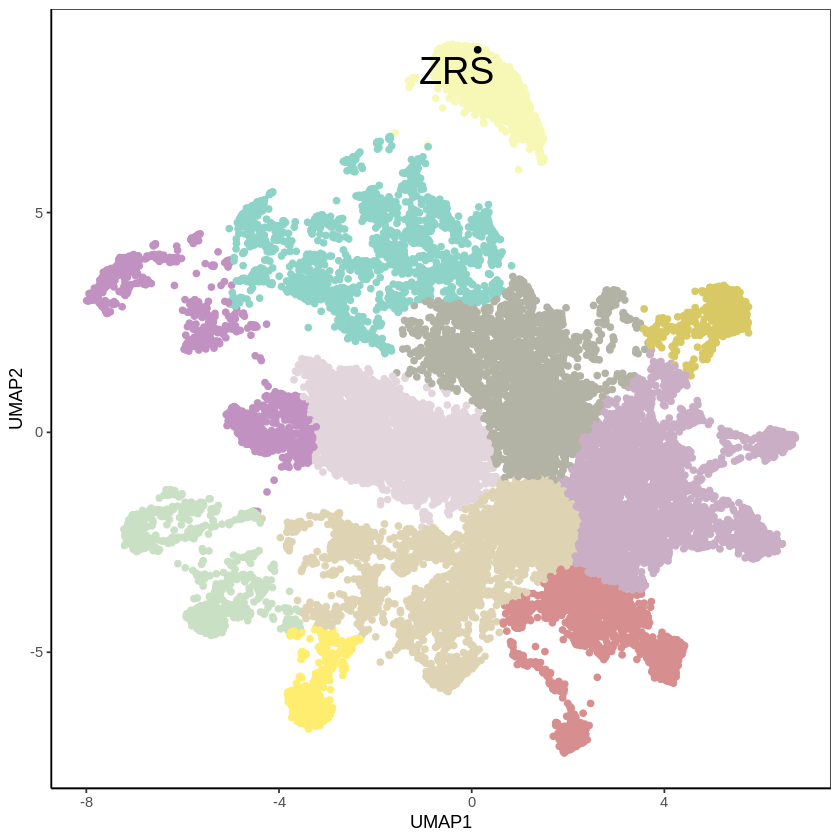

In [ ]:
ggplot(
  umap_df[umap_df$UMAP1 < 20,],
  aes(
    x = UMAP1,
    y = UMAP2,
    
  )
) + geom_point( aes(color = factor(cluster))) +
  #geom_point(data= highlight, color = 'lightblue', show.legend = FALSE) + 
  geom_point(data=highlight_ZRS, color = 'black', show.legend = FALSE) + 
  geom_text_repel(data=highlight_ZRS, label = 'ZRS', size = 8) +
  scale_color_manual(values = myPal) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.position = 'none',
panel.background = element_blank(), axis.line = element_line(colour = "black"))

## Getting the peaks clustered with ZRS region to use the GeneID as an input for pathway analysis

In [ ]:
umap_df[grepl('chr5:29315271-29315470', umap_df$GI),]

,GI,UMAP1,UMAP2,gene,cluster
,<chr>,<dbl>,<dbl>,<chr>,<dbl>
37172,chr5:29315271-29315470,0.1244505,8.701602,Lmbr1,2


In [ ]:
#number_of_peaks_zrs 
dim(umap_df[umap_df$cluster == 2,])

[1] 4690    5

In [ ]:
ZRS_cluster <- umap_df[umap_df$cluster == 2,]

In [ ]:
dim(ZRS_cluster)

[1] 4690    5

## Pathway analysis

In [ ]:
gene_dat <- anno_gi[anno_gi$GI %in% ZRS_cluster$GI,] ## Mapping the 4960 Genomic intervals to subset the annotation data to get the gene symbol

In [ ]:
head(gene_dat)


,GI,gene
,<chr>,<chr>
2,chr1:3400047-3400246,Xkr4
4,chr1:3649033-3649232,Xkr4
141,chr1:7316942-7317141,Pcmtd1
169,chr1:8626280-8626479,Sntg1
256,chr1:10337703-10337902,Arfgef1
266,chr1:10591263-10591462,Cpa6


In [ ]:
dat <- merge(gene_dat, ZRS_cluster, by = c('GI','gene')) ## Merging the annotation data and correlation data

In [ ]:
head(dat)

,GI,gene,UMAP1,UMAP2,cluster
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,chr1:102605212-102605411,Gm20268,1.3105184,6.857508,2
2,chr1:10337703-10337902,Arfgef1,0.3723033,8.191135,2
3,chr1:104227077-104227276,Cdh20,0.4013824,7.300447,2
4,chr1:104763603-104763802,Cdh20,-0.5287152,8.402472,2
5,chr1:104924768-104924967,Cdh20,0.5125804,7.469991,2
6,chr1:104968937-104969136,Cdh20,1.3160321,6.850189,2


In [ ]:
geneID <- mapIds(org.Mm.eg.db, dat$gene, 'ENTREZID', 'SYMBOL') ## converting symol to entrez ID

'select()' returned 1:1 mapping between keys and columns



In [ ]:
head(geneID)

$Gm20268
[1] "100504525"

$Arfgef1
[1] "211673"

$Cdh20
[1] "23836"

$Cdh20
[1] "23836"

$Cdh20
[1] "23836"

$Cdh20
[1] "23836"

In [ ]:
go <- enrichGO(gene = geneID,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE) ##GO enrichment terms

In [ ]:
go

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3197] "100504525" "211673" "23836" "329093" "635504" "102466254" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...1240 enriched terms found
'data.frame':	1240 obs. of  9 variables:
 $ ID         : chr  "GO:0007409" "GO:0050808" "GO:0030900" "GO:0098742" ...
 $ Description: chr  "axonogenesis" "synapse organization" "forebrain development" "cell-cell adhesion via plasma-membrane adhesion molecules" ...
 $ GeneRatio  : chr  "145/2912" "136/2912" "115/2912" "78/2912" ...
 $ BgRatio    : chr  "487/29008" "489/29008" "400/29008" "213/29008" ...
 $ pvalue     : num  1.85e-34 4.66e-29 4.19e-26 1.88e-25 4.92e-25 ...
 $ p.adjust   : num  1.14e-30 1.43e-25 8.62e-23 2.89e-22 6.06e-22 ...
 $ qvalue     : num  7.37e-31 9.28e-26 5.57e-23 1.87e-22 3.92e-22 ...
 $ geneID     : chr  "Actr3/Lhx4/Tnr/Enah/Tgfb2/Plxna2/Dst/Nrp2/Klf7/Map2/Fn1/Epha4/Gbx2/Lrp1/Lama2/Nr2e1/Ank3/A

In [ ]:
enrich_go <- go %>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

In [ ]:
enrich_go

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:3197] "100504525" "211673" "23836" "329093" "635504" "102466254" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...205 enriched terms found
'data.frame':	205 obs. of  9 variables:
 $ ID         : chr  "GO:0030900" "GO:0060485" "GO:0021537" "GO:0048736" ...
 $ Description: chr  "forebrain development" "mesenchyme development" "telencephalon development" "appendage development" ...
 $ GeneRatio  : chr  "115/2912" "83/2912" "76/2912" "66/2912" ...
 $ BgRatio    : chr  "400/29008" "293/29008" "257/29008" "206/29008" ...
 $ pvalue     : num  4.19e-26 8.88e-19 1.74e-18 3.21e-18 3.21e-18 ...
 $ p.adjust   : num  8.62e-23 2.88e-16 4.87e-16 8.24e-16 8.24e-16 ...
 $ qvalue     : num  5.57e-23 1.86e-16 3.15e-16 5.33e-16 5.33e-16 ...
 $ geneID     : chr  "Kif14/Uchl5/Tnr/Tbx19/Satb2/Nrp2/Erbb4/Gbx2/Frs2/Hdac2/Fyn/Nr2e1/Rfx4/Ascl1/Egfr/Kif3a/Nog/Dicer1/Bcl11b/Lamb1/"| _

In [ ]:
head(enrich_go)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030900,GO:0030900,forebrain development,115/2912,400/29008,4.193610e-26,8.616470e-23,5.572351e-23,Kif14/Uchl5/Tnr/Tbx19/Satb2/Nrp2/Erbb4/Gbx2/Frs2/Hdac2/Fyn/Nr2e1/Rfx4/Ascl1/Egfr/Kif3a/Nog/Dicer1/Bcl11b/Lamb1/Hif1a/Syne2/Ttc8/Zswim6/Isl1/Fgf10/Id4/Pitx1/Agtpbp1/Pou4f1/Rarb/Zmiz1/Hesx1/Wnt5a/Dnah5/Sema5a/Ext1/Lrrk2/Ephb3/Gsk3b/Robo1/Robo2/App/Mdga1/Alk/Six3/Cdh2/Pfdn1/Cep120/Ndst1/Csf1r/Sall3/Gnaq/Prkg1/Pten/Slit1/Tcf7l2/Emx2/Slc1a2/Pax6/Tyro3/Bmp2/Plcb1/Btbd3/Notch1/Lhx6/Lhx2/Zeb2/Nr4a2/Slc4a10/Ccdc141/Neurog2/Ptger3/Mecom/Fgf2/Fat4/Slc7a11/Dclk1/P2ry12/Dclk2/Elavl4/Ephb2/Ski/Pax5/Tox/Chd7/Ncor2/Sema3a/Reln/Slit2/Gsx2/Epha5/Atg7/Cxcl12/Lrp6/Foxp2/Cntnap2/Wnt7a/Aldh1a3/Gdpd5/Sox1/Disc1/Nrp1/Nrg1/Dlc1/Sall1/Adgrg1/Ulk4/Kirrel3/Ncam1/Dync2h1/Aldh1a2/Rnf7/Pou3f4/Plxna3,115
GO:0060485,GO:0060485,mesenchyme development,83/2912,293/29008,8.875844e-19,2.879511e-16,1.862206e-16,Tgfb2/Nrp2/Erbb4/Fn1/Pax3/Gbx2/Pawr/Cited2/Hey2/Hdac2/Axin2/Spred2/Hand1/Nog/Tmem100/Dicer1/Sox11/Hif1a/Osr1/Isl1/Fgf10/Foxc1/Edn1/Rbm24/Sema4d/Msx2/Foxd1/Il17rd/Wnt5a/Fermt2/Fgf9/Gata4/Sema5a/Ext1/Has2/Dab2/Gdnf/Ranbp3l/Sema5b/Gsk3b/Epha3/Robo1/Robo2/Tiam1/Erg/Tsc2/Vegfa/Cdh2/Sema6a/Nfatc1/Sdhaf2/Pten/Tcf7l2/Wt1/Pax6/Spred1/Bmp2/Foxa2/Bmp7/Notch1/Zeb2/Hey1/Pef1/Phactr4/Bnc2/Tgfbr3/Tbx5/Sema3d/Sema3a/Ret/Lrp6/Exoc4/Ezh2/Kbtbd8/Tead1/Wnt11/Nrp1/Sfrp1/Zfp703/Sema3f/Aldh1a2/Bmp5/Efnb1,83
GO:0021537,GO:0021537,telencephalon development,76/2912,257/29008,1.738898e-18,4.872075e-16,3.150816e-16,Kif14/Uchl5/Tnr/Erbb4/Hdac2/Nr2e1/Rfx4/Ascl1/Egfr/Kif3a/Dicer1/Bcl11b/Lamb1/Hif1a/Syne2/Ttc8/Zswim6/Id4/Agtpbp1/Rarb/Zmiz1/Wnt5a/Dnah5/Ext1/Lrrk2/Ephb3/Gsk3b/Robo1/Robo2/Mdga1/Alk/Six3/Cdh2/Pfdn1/Cep120/Csf1r/Sall3/Pten/Slit1/Emx2/Slc1a2/Pax6/Bmp2/Plcb1/Btbd3/Lhx6/Lhx2/Zeb2/Ccdc141/Fat4/Slc7a11/P2ry12/Dclk2/Ephb2/Ski/Pax5/Chd7/Ncor2/Sema3a/Reln/Slit2/Gsx2/Epha5/Atg7/Cxcl12/Lrp6/Foxp2/Aldh1a3/Disc1/Nrg1/Sall1/Adgrg1/Ulk4/Kirrel3/Rnf7/Plxna3,76
GO:0048736,GO:0048736,appendage development,66/2912,206/29008,3.206418e-18,8.235151e-16,5.325748e-16,En1/Pbx1/Tgfb2/Plxna2/Tfap2b/Aff3/Hdac2/Chst11/Kremen1/Wnt9a/Tbx4/Nog/Dicer1/Mycn/Sox11/Osr1/Fgf10/Ror2/Msx2/Pitx1/Rarb/Wnt5a/Fermt2/Fgf9/Hoxc13/Grhl2/Fzd6/Rspo2/Ext1/Runx2/Pkdcc/Sall3/Gnaq/Pcsk5/Lrp5/Fbxw4/Bcl2l11/Sall4/Bmp7/Gnas/Notch1/Lmx1b/Lnpk/Lrp4/Alx3/Bmpr1b/Mecom/Slc7a11/Mbnl1/Shox2/Gja5/Notch2/Kdf1/Ski/Chd7/Asph/Tbx5/Lmbr1/Cacna1c/Lrp6/Hoxa13/Wnt7a/Sall1/Sik3/Dync2h1/Aldh1a2,66
GO:0060173,GO:0060173,limb development,66/2912,206/29008,3.206418e-18,8.235151e-16,5.325748e-16,En1/Pbx1/Tgfb2/Plxna2/Tfap2b/Aff3/Hdac2/Chst11/Kremen1/Wnt9a/Tbx4/Nog/Dicer1/Mycn/Sox11/Osr1/Fgf10/Ror2/Msx2/Pitx1/Rarb/Wnt5a/Fermt2/Fgf9/Hoxc13/Grhl2/Fzd6/Rspo2/Ext1/Runx2/Pkdcc/Sall3/Gnaq/Pcsk5/Lrp5/Fbxw4/Bcl2l11/Sall4/Bmp7/Gnas/Notch1/Lmx1b/Lnpk/Lrp4/Alx3/Bmpr1b/Mecom/Slc7a11/Mbnl1/Shox2/Gja5/Notch2/Kdf1/Ski/Chd7/Asph/Tbx5/Lmbr1/Cacna1c/Lrp6/Hoxa13/Wnt7a/Sall1/Sik3/Dync2h1/Aldh1a2,66
GO:0060537,GO:0060537,muscle tissue development,113/2912,486/29008,9.800489e-18,2.323470e-15,1.502609e-15,Eya1/Rgs2/Msc/Rgs4/Tgfb2/Tfap2b/Col19a1/Mstn/Erbb4/Pax3/Hdac4/Frs2/Lemd3/Cited2/Hey2/Hdac2/Popdc3/Cdk1/Igf1/Meis1/Sgcd/Hand1/Pmp22/Nog/Dicer1/Sox11/Hdac9/Ifrd1/Akap6/Osr1/Nln/Isl1/Ryr2/Foxc1/Edn1/Jarid2/Rbm24/Pitx1/Homer1/Pou4f1/Rarb/Nr1d2/Wnt5a/Fgf9/Sgcg/Gata4/Adra1a/Bin3/Flnb/Klf5/Zfpm2/Angpt1/Mylk/Gsk3b/Boc/Rbfox1/Pim1/Sik1/Vegfa/Slc8a1/Gata6/Fgf1/Svil/Pten/Ankrd2/Tcf7l2/Wt1/Bmp2/Eya2/Bmp7/Mir133a-2/Notch1/Col11a1/S1pr1/Ppp3ca/Skil/Fgf2/Mbnl1/Shox2/Schip1/Hey1/Gja5/Ski/Pax5/Chd7/Tgfbr3/Myo18b/Tbx5/Eln/Ppargc1a/Atg7/Lrp6/Foxp2/Cav2/Met/Dysf/Foxp1/Sox6/Tshz3/Akap13/Tenm4/Itgb1/Nrg1/Sorbs2/Efnb2/Irx3/Tdgf1/Ncam1/Aldh1a2/Bmp5/Tbx18/Agtr2/Dmd,113


Warning message:
“ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


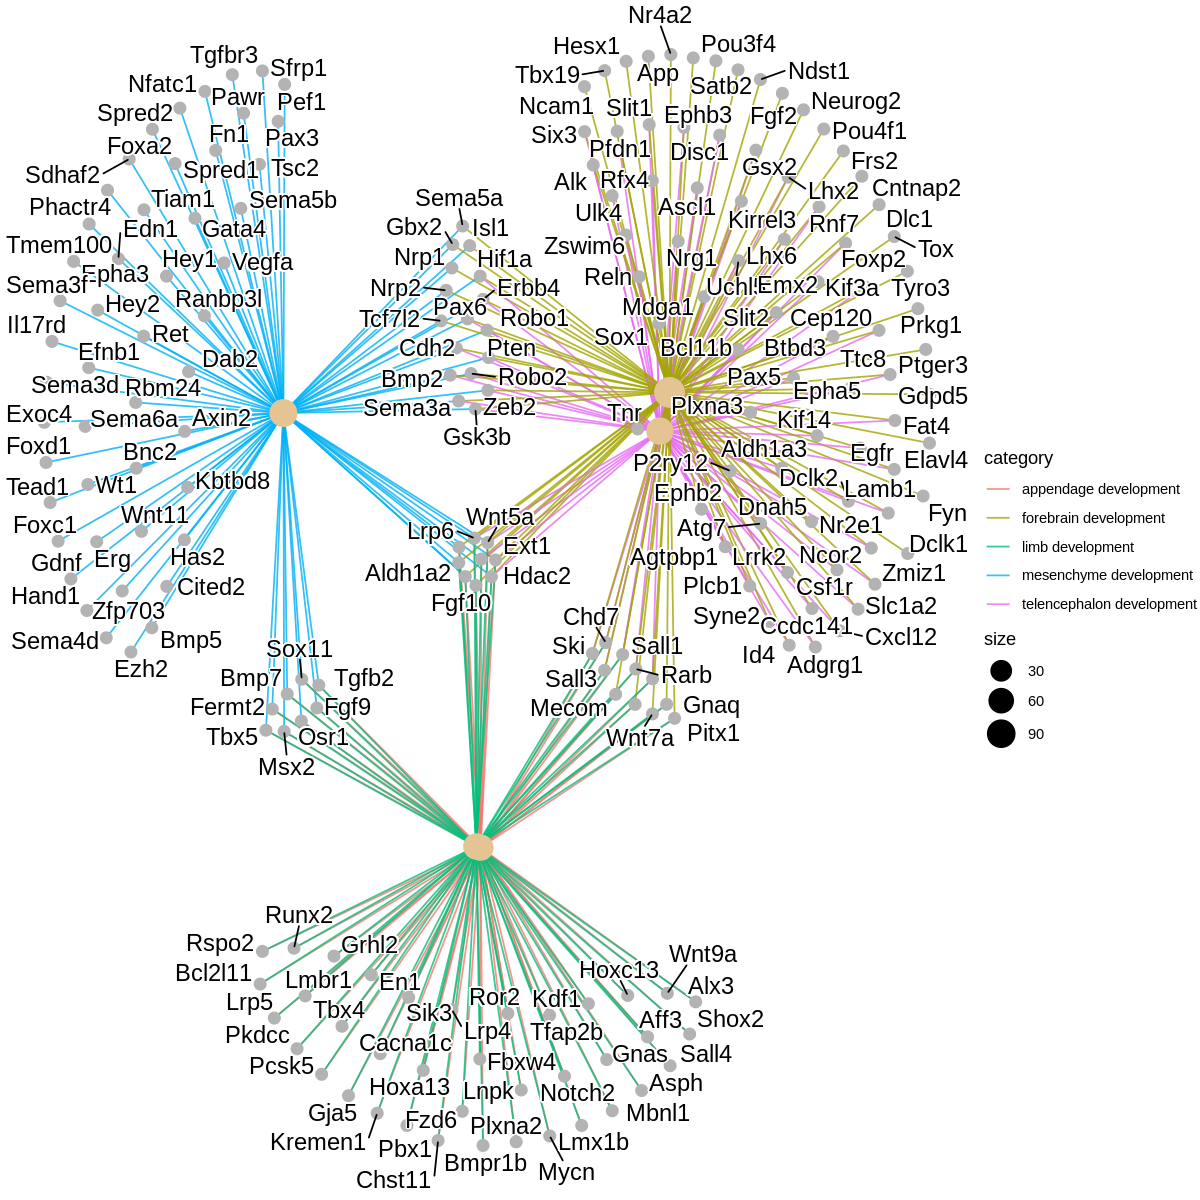

In [ ]:
options(repr.plot.width=10, repr.plot.height = 10)
cnetplot(enrich_go, node_label="gene", colorEdge = TRUE) ## GO terms

In the non-biased approach we see limb development in the top 5 most significant pathways. When we subset it to included limb in the terms, we see that the genes in the genomic intervals similar to ZRS include limb morphogenesis and limb development related terms.

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2                       
 [2] cccd_1.5                                 
 [3] igraph_1.2.11                            
 [4] hopach_2.54.0                            
 [5] cluster_2.1.2                            
 [6] string

In [ ]:
Sys.time() - start_time0

Time difference of 1.244615 hours